In [29]:
import pandas as pd 
import numpy as np

In [30]:
import matplotlib.pyplot as plt 
import seaborn as sns

In [31]:
df=pd.read_csv("hanoi_fire_changed.csv")
df

,Building_Type,Building_Height_(m),Number_of_Floors,Fire_Occurrence,Type_of_Fire,Fire_Scale,Number_of_People_Rescued,Number_of_Fire_Extinguishers,Sprinkler_System_Present,Number_of_Emergency_Exits,Number_of_Fire_Alarms,Electrical_Equipment_Inspection_Conducted,Gas_Equipment_Inspection_Conducted,Recent_Repair_Replacement_History,Temperature_(_C),Humidity_(%),Wind_Speed_(m_s),Precipitation_(mm)
0,Residential,34,10,Yes,Chemical,Large,38,3,Yes,10,10,Yes,Yes,1-3 years,21.100000,41.100000,4.200000,25.300000
1,Commercial,14,4,Yes,Chemical,Small,17,6,Yes,4,6,Yes,Yes,None,28.400000,99.400000,4.500000,43.200000
2,Residential,14,4,Yes,Electrical,Medium,8,6,No,5,6,Yes,Yes,None,16.500000,66.900000,4.400000,82.500000
3,Commercial,14,4,Yes,Negligence,Large,31,4,No,6,10,Yes,Yes,Within 1 year,25.200000,78.400000,4.100000,72.400000
4,Commercial,45,13,No,Negligence,Medium,22,7,Yes,14,1,No,Yes,1-3 years,17.300000,84.900000,3.600000,17.400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,Residential,8,3,No,Chemical,Medium,22,2,No,6,6,No,Yes,None,16.846740,77.189072,0.600000,6.894205
15996,Residential,34,10,No,Chemical,Small,24,9,No,8,8,No,No,Within 1 year,25.540487,44.240458,3.978134,10.576464
15997,Industrial,5,1,No,Chemical,Small,46,5,No,1,10,No,No,None,19.311898,48.137617,3.534311,94.100000
15998,Residential,25,6,No,Electrical,Small,30,7,Yes,7,4,Yes,No,None,15.100000,78.808682,3.262760,2.300000


In [32]:
df.describe()

,Building_Height_(m),Number_of_Floors,Number_of_People_Rescued,Number_of_Fire_Extinguishers,Number_of_Emergency_Exits,Number_of_Fire_Alarms,Temperature_(_C),Humidity_(%),Wind_Speed_(m_s),Precipitation_(mm)
count,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000
mean,25.972250,7.393313,26.211562,5.904438,6.924625,7.144875,21.615004,70.432491,2.651318,37.448751
std,11.472955,3.362841,12.619380,2.388313,3.676876,4.627942,3.951822,15.620195,1.113276,23.477185
min,5.000000,1.000000,0.000000,1.000000,1.000000,0.000000,15.100000,40.400000,0.600000,2.300000
25%,18.000000,5.000000,17.000000,4.000000,4.000000,4.000000,18.582037,59.115496,1.838923,19.058235
50%,26.000000,7.000000,26.000000,6.000000,7.000000,7.000000,21.565216,70.425585,2.638427,36.521390
75%,34.000000,10.000000,35.000000,8.000000,9.000000,10.000000,24.422247,81.883972,3.440322,53.738182
max,49.000000,14.000000,50.000000,10.000000,17.000000,20.000000,29.700000,99.400000,4.900000,94.100000


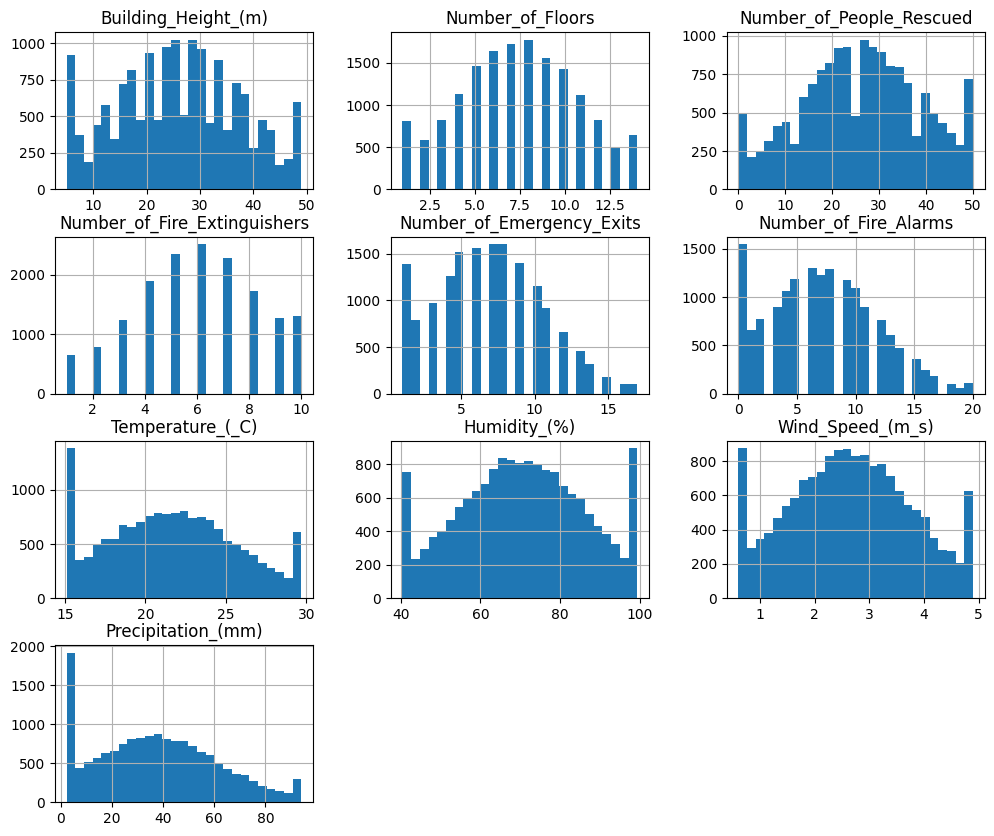

In [33]:
df.hist(bins=27, figsize=(12, 10))
plt.show()

In [34]:
df["Fire_Occurrence"].value_counts()

No     9769
Yes    6231
Name: Fire_Occurrence, dtype: int64

C:\Users\MinhHoang\AppData\Local\Temp\ipykernel_2300\1245717008.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


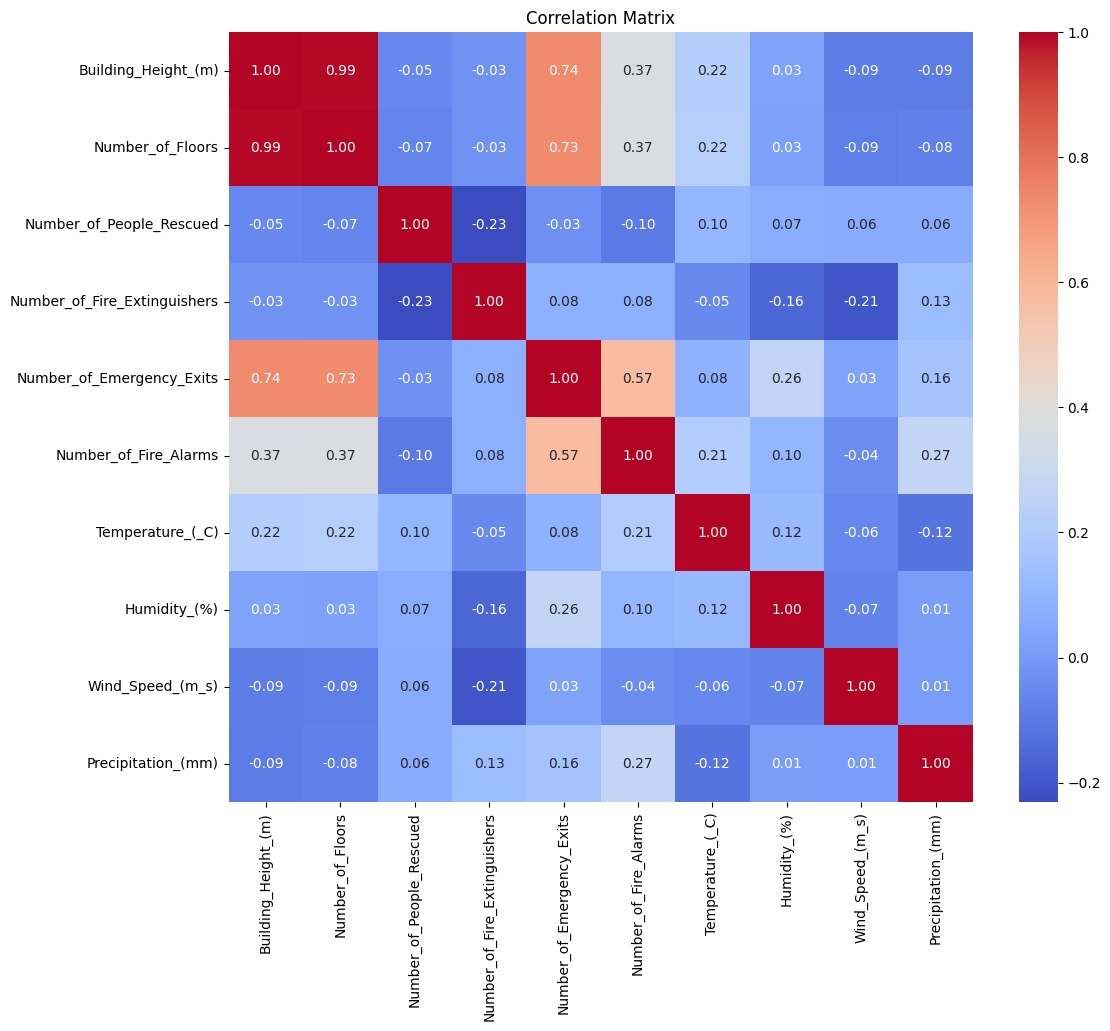

In [35]:
correlation_matrix = df.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


# Preprocessing

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score, mean_absolute_error



In [37]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

In [38]:
df.dropna(subset=["Fire_Occurrence"],inplace=True)

In [39]:
repair = {
    'Within 1 year': 0.75,
    '1-3 years': 0.5,
    'Over 3 years': 0.25,
    'None':0
}

# Apply the mapping to the specified column
df['repair'] = df['Recent_Repair_Replacement_History'].map(repair)
df.drop(columns=["Recent_Repair_Replacement_History"],inplace=True)
df

,Building_Type,Building_Height_(m),Number_of_Floors,Fire_Occurrence,Type_of_Fire,Fire_Scale,Number_of_People_Rescued,Number_of_Fire_Extinguishers,Sprinkler_System_Present,Number_of_Emergency_Exits,Number_of_Fire_Alarms,Electrical_Equipment_Inspection_Conducted,Gas_Equipment_Inspection_Conducted,Temperature_(_C),Humidity_(%),Wind_Speed_(m_s),Precipitation_(mm),repair
0,Residential,34,10,Yes,Chemical,Large,38,3,Yes,10,10,Yes,Yes,21.100000,41.100000,4.200000,25.300000,0.50
1,Commercial,14,4,Yes,Chemical,Small,17,6,Yes,4,6,Yes,Yes,28.400000,99.400000,4.500000,43.200000,0.00
2,Residential,14,4,Yes,Electrical,Medium,8,6,No,5,6,Yes,Yes,16.500000,66.900000,4.400000,82.500000,0.00
3,Commercial,14,4,Yes,Negligence,Large,31,4,No,6,10,Yes,Yes,25.200000,78.400000,4.100000,72.400000,0.75
4,Commercial,45,13,No,Negligence,Medium,22,7,Yes,14,1,No,Yes,17.300000,84.900000,3.600000,17.400000,0.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,Residential,8,3,No,Chemical,Medium,22,2,No,6,6,No,Yes,16.846740,77.189072,0.600000,6.894205,0.00
15996,Residential,34,10,No,Chemical,Small,24,9,No,8,8,No,No,25.540487,44.240458,3.978134,10.576464,0.75
15997,Industrial,5,1,No,Chemical,Small,46,5,No,1,10,No,No,19.311898,48.137617,3.534311,94.100000,0.00
15998,Residential,25,6,No,Electrical,Small,30,7,Yes,7,4,Yes,No,15.100000,78.808682,3.262760,2.300000,0.00


In [40]:
df["Humidity_(%)"]=df["Humidity_(%)"]/100

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 18 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Building_Type                              16000 non-null  object 
 1   Building_Height_(m)                        16000 non-null  int64  
 2   Number_of_Floors                           16000 non-null  int64  
 3   Fire_Occurrence                            16000 non-null  object 
 4   Type_of_Fire                               16000 non-null  object 
 5   Fire_Scale                                 16000 non-null  object 
 6   Number_of_People_Rescued                   16000 non-null  int64  
 7   Number_of_Fire_Extinguishers               16000 non-null  int64  
 8   Sprinkler_System_Present                   16000 non-null  object 
 9   Number_of_Emergency_Exits                  16000 non-null  int64  
 10  Number_of_Fire_Alarms 

In [42]:
categorical_cols = df.select_dtypes(include=['object']).columns
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Separate features (X) and target variable (y)
X = df_encoded.drop(columns=['Fire_Occurrence_Yes'])
y = df_encoded['Fire_Occurrence_Yes']

In [44]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 21 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Building_Height_(m)                            16000 non-null  int64  
 1   Number_of_Floors                               16000 non-null  int64  
 2   Number_of_People_Rescued                       16000 non-null  int64  
 3   Number_of_Fire_Extinguishers                   16000 non-null  int64  
 4   Number_of_Emergency_Exits                      16000 non-null  int64  
 5   Number_of_Fire_Alarms                          16000 non-null  int64  
 6   Temperature_(_C)                               16000 non-null  float64
 7   Humidity_(%)                                   16000 non-null  float64
 8   Wind_Speed_(m_s)                               16000 non-null  float64
 9   Precipitation_(mm)                             160

In [45]:
df=df_encoded

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the preprocessed data
print("Preprocessed DataFrame:")
print(X_train.head())

Preprocessed DataFrame:
       Building_Height_(m)  Number_of_Floors  Number_of_People_Rescued  \
676                     49                14                        23   
12113                    7                 2                        23   
7077                    35                10                        13   
13005                   36                10                        20   
12123                   21                 6                        23   

       Number_of_Fire_Extinguishers  Number_of_Emergency_Exits  \
676                               2                         12   
12113                             7                          3   
7077                              5                         14   
13005                             7                         11   
12123                             5                          5   

       Number_of_Fire_Alarms  Temperature_(_C)  Humidity_(%)  \
676                       10         15.100000      0.710572   
12113 

In [49]:
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

majority_class = df[df['Fire_Occurrence_Yes'] == 0]
minority_class = df[df['Fire_Occurrence_Yes'] == 1]

majority_downsampled = resample(majority_class, replace=False, n_samples=len(minority_class), random_state=42)

resampled_data = pd.concat([minority_class, majority_downsampled])

X_resampled = resampled_data.drop(columns=['Fire_Occurrence_Yes'])
y_resampled = resampled_data['Fire_Occurrence_Yes']


X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42
)

clf_resampled = RandomForestClassifier(random_state=42)
clf_resampled.fit(X_train_resampled, y_train_resampled)


y_pred_resampled = clf_resampled.predict(X_test)


accuracy_resampled = accuracy_score(y_test, y_pred_resampled)
conf_matrix_resampled = confusion_matrix(y_test, y_pred_resampled)
classification_rep_resampled = classification_report(y_test, y_pred_resampled)


print("Accuracy with Resampled Data:", accuracy_resampled)
print("\nConfusion Matrix:\n", conf_matrix_resampled)
print("\nClassification Report:\n", classification_rep_resampled)


Accuracy with Resampled Data: 0.8746875

Confusion Matrix:
 [[1664  314]
 [  87 1135]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.84      0.89      1978
           1       0.78      0.93      0.85      1222

    accuracy                           0.87      3200
   macro avg       0.87      0.89      0.87      3200
weighted avg       0.89      0.87      0.88      3200



In [53]:
resampled_data

,Building_Height_(m),Number_of_Floors,Number_of_People_Rescued,Number_of_Fire_Extinguishers,Number_of_Emergency_Exits,Number_of_Fire_Alarms,Temperature_(_C),Humidity_(%),Wind_Speed_(m_s),Precipitation_(mm),...,Building_Type_Industrial,Building_Type_Residential,Fire_Occurrence_Yes,Type_of_Fire_Electrical,Type_of_Fire_Negligence,Fire_Scale_Medium,Fire_Scale_Small,Sprinkler_System_Present_Yes,Electrical_Equipment_Inspection_Conducted_Yes,Gas_Equipment_Inspection_Conducted_Yes
0,34,10,38,3,10,10,21.100000,0.411000,4.200000,25.300000,...,0,1,1,0,0,0,0,1,1,1
1,14,4,17,6,4,6,28.400000,0.994000,4.500000,43.200000,...,0,0,1,0,0,0,1,1,1,1
2,14,4,8,6,5,6,16.500000,0.669000,4.400000,82.500000,...,0,1,1,1,0,1,0,0,1,1
3,14,4,31,4,6,10,25.200000,0.784000,4.100000,72.400000,...,0,0,1,0,1,0,0,0,1,1
7,29,8,33,10,6,8,27.700000,0.629000,4.200000,12.200000,...,1,0,1,0,1,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44,49,14,25,8,17,20,27.300000,0.905000,2.500000,21.300000,...,0,1,0,0,1,0,0,1,0,0
5722,23,7,13,5,7,15,21.915867,0.557333,4.490191,75.515073,...,0,0,0,0,1,1,0,1,0,1
1834,21,6,30,10,5,0,24.492773,0.509218,1.011083,6.467538,...,0,1,0,0,1,0,1,0,1,0
7812,13,3,36,6,4,0,17.334184,0.994000,4.900000,2.300000,...,0,0,0,0,1,0,1,1,0,0


In [ ]:
import pickle

# Save the trained model to a file
with open('resampled_model.pkl', 'wb') as model_file:
    pickle.dump(clf_resampled, model_file)
pickle.dump(df,open('df.pkl', 'wb'))